## Clothes Purchase Helper

## 1. Data preparation, conversion, cleaning, and exploration

As an indecisive person, I often struggle figuring out what I would like to buy when going to shopping. At the same time, I find that I have a lot of pictures of clothes saved in my Instagram collections. For this assignment, I thought it would be fun to use the data I had in my saved collections to first cluster the similar clothing items together and then create an aggregate of all of the clothes from that cluster. 

For completing the data preparation, the following steps were used:
1. Downloading the images of clothes from Instagram Saved.
2. Separating the clothing items into separate pictures each, ensuring that each picture had a white background and only one pieceo of clothing (e.g., only one pair of shoes).
3. Resizing the images into 56x56 pixels and converting them into grey scale.
4. Deleting the images that got corrupted upon resizing and grey scaling (turned into primarily white images).
5. Storing the output as a numpy array for future processing.

To qualify as a clothing item, the piece had to be a top, a bottom, a dress, a pair of shoes, or a bag. The following clothing items were not included in the dataset: jewelry, hats, scarves, and socks. Originally, there had been approximately 260 clothing items in my Instagram Saved; however, after the pre-processing, only 140 remained.

Something that was important for this project was making it as unsupervised as possible -- if I wanted to make an informed decision by manually counting the number of dresses or the number of shirts I wanted to buy, I would set up a spreadsheet; therefore, I did not label the clothing items. 

In [115]:

# # CODE FOR PREPROCESSING IMAGES. DO NOT RUN!!!

# # rename all the images in Instagram Saved Clothes folder to image1, image2, etc.
# import os
# from glob import glob
# import numpy as np
# from PIL import Image


# path = "C:/Users/Polin/OneDrive/Documents/GitHub/CS156/Instagram Saved Clothes"
# """
# print os directory
# # change directory to current directory
# images = glob.glob(os.path.join(path, '*.jpeg')) + glob.glob(os.path.join(path, '*.jpg')) + glob.glob(os.path.join(path, '*.png'))

# for i, image in enumerate(images):
#     new_name = f'image{i+1}.jpg'
#     os.rename(image, os.path.join(path, new_name))
# """

# resized_path = "C:/Users/Polin/OneDrive/Documents/GitHub/CS156/Resized"


# def resize_image(image_path, new_size):
#     with Image.open(image_path) as image:
#         width, height = image.size
#         # find the larger dimension
#         max_dim = max(width, height)
#         # calculate the new height and width
#         new_width = int(width * (new_size / max_dim))
#         new_height = int(height * (new_size / max_dim))
#         image_resized = image.resize((new_width, new_height), Image.LANCZOS)
        
#         # create a new image with the desired size, and paste the resized image onto it
#         new_image = Image.new(image.mode, (new_size, new_size), (255, 255, 255))
#         x_offset = int((new_size - new_size) / 2)
#         y_offset = int((new_size - new_height) / 2)
#         new_image.paste(image_resized, (x_offset, y_offset))

#         # create another new image with the desired size, and paste the centered resized image onto it
#         new_image_padded = Image.new(image.mode, (new_size, new_size), (255, 255, 255))
#         x_offset_padded = int((new_size - new_image.size[0]) / 2)
#         y_offset_padded = int((new_size - new_image.size[1]) / 2)
#         new_image_padded.paste(new_image, (x_offset_padded, y_offset_padded))

#         return new_image_padded



# input_folder = path
# output_folder = resized_path
# new_size = 28

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# for i, image_path in enumerate(glob(os.path.join(input_folder, '*.jpg'))):
#     image_resized = resize_image(image_path, new_size)
#     output_path = os.path.join(output_folder, f'image{i}.jpg')
#     image_resized.save(output_path)


# # turn the images from Resize folder to greyscale

# resized_path = "C:/Users/Polin/OneDrive/Documents/GitHub/CS156/Resized"

# input_folder = resized_path
# grey_resized_path = 'C:/Users/Polin/OneDrive/Documents/GitHub/CS156/Resized_grey'
# output_folder = grey_resized_path

# for image_path in glob(os.path.join(input_folder, '*.jpg')):
#     with Image.open(image_path) as image:
#         # Convert the image to grayscale and then to a numpy array
#         image = image.convert('L')
#         image_array = np.array(image)
#         # Flatten the array to a 1D vector and append it to the list
#         image_vector = image_array.flatten()
#         # Save the image
#         image_resized = Image.fromarray(image_array)
#         output_path = os.path.join(output_folder, os.path.basename(image_path))
#         image_resized.save(output_path)



# # turn the images into a numpy array
# # the total array should be a 3d vector : (number of images, 28, 28)

# input_folder = grey_resized_path
# output_folder = 'C:/Users/Polin/OneDrive/Documents/GitHub/CS156/Resized_grey_array'

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# images = []
# for image_path in glob(os.path.join(input_folder, '*.jpg')):
#     with Image.open(image_path) as image:
#         threshold = 220
#         # Convert the image to grayscale and then to a numpy array
#         image = image.convert('L')
#         image_array = np.array(image)
#         image_array[image_array > threshold] = 255
#         image_resized = Image.fromarray(image_array)
#         image_resized.save(output_path)
#         images.append(image_array)

# images = np.array(images)
# np.save(os.path.join(output_folder, 'images.npy'), images)



C:\Users\Polin\AppData\Local\Temp\ipykernel_16600\891935826.py:32: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image_resized = image.resize((new_width, new_height), Image.LANCZOS)


In [13]:
import numpy as np
import os

try: 
    import keras
except:
    !pip install keras
    import keras

try:
    from keras.datasets import fashion_mnist
except:
    !pip install tensorflow
    from keras.datasets import fashion_mnist
    
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA


In [14]:
input_folder = 'Resized_grey_array'

images = np.load(os.path.join(input_folder, 'images.npy'))

images_array = images
images_array.shape
# This makes sense since there are 219 images

(219, 28, 28)

First 10 images


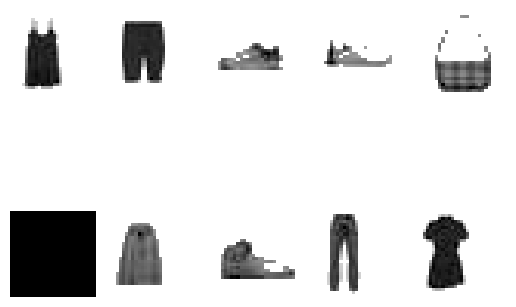

First 10 images after removing noisy images


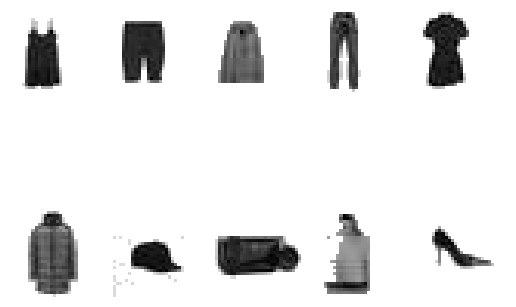

In [15]:
# visualize the first 10 images
print('First 10 images')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images_array[i], cmap='gray')
    plt.axis('off')
plt.show()


# remove the noisy images
images_array_save = images_array
images_array = images_array.reshape(-1, images_array.shape[1]*images_array.shape[2]) # reshape to 2d array
new_size = 28


okay_images = []
for i in range(0, len(images_array)):
    img = images_array_save[i].reshape(new_size, new_size)
    # if img is mainly composed of white pixels, remove it
    if np.mean(img) > 240:
        # remove it from cluster_index 
        continue
    else:
        okay_images.append(images_array[i])


new_dataSet = StandardScaler().fit_transform(okay_images)

# visualize the new images
print('First 10 images after removing noisy images')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(okay_images[i].reshape(new_size, new_size), cmap='gray')
    plt.axis('off')

In [16]:
print('Number of images after removing noisy images: ', len(okay_images))

Number of images after removing noisy images:  146


4422102/4422102 [==============================] - 0s 0us/step
First 10 images from fashion mnist dataset


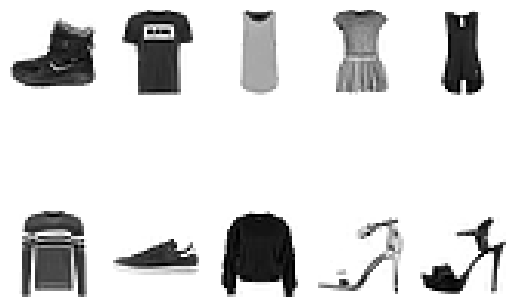

In [17]:
# get fashion dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# reshape the data
X_train = X_train.reshape(-1, X_train.shape[1] * X_train.shape[2])

# invert the colors in X_train data
X_train = 255 - X_train

# visualize the first 10 images
print('First 10 images from fashion mnist dataset')
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

In [18]:
# how many observations in fashion mnist dataset
print('Number of observations in fashion mnist dataset: ', len(X_train))

Number of observations in fashion mnist dataset:  60000


### PCA

The PCA analysis ran on this dataset shows that the 

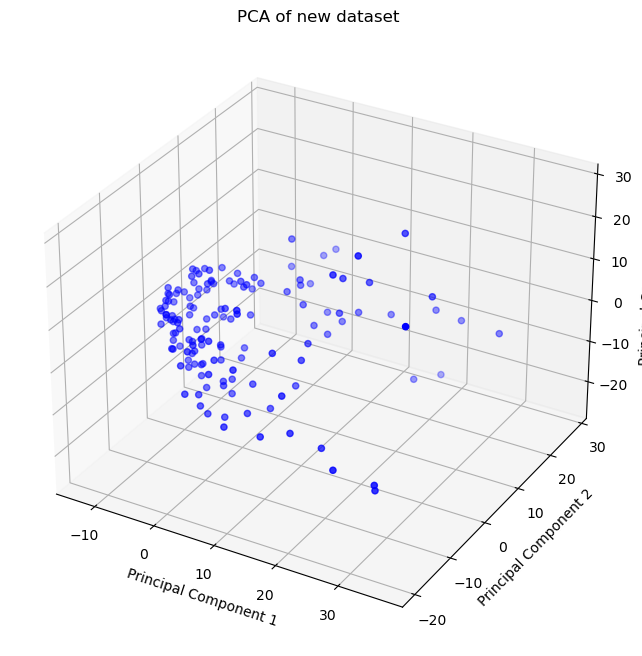

Explained variation per principal component: [0.15254205 0.11903363 0.08280776]
Total explained variation: 0.3543834310579218


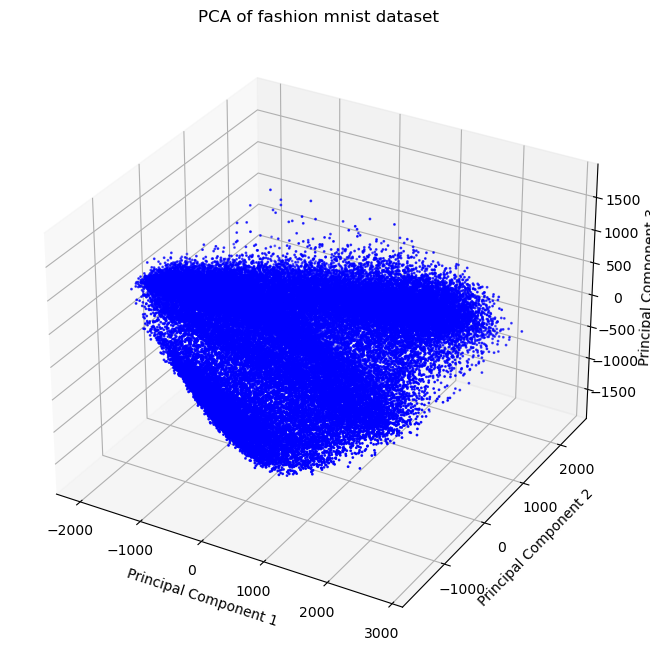

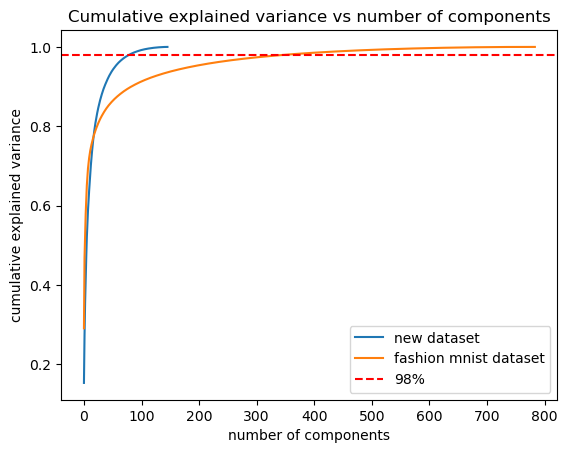

In [19]:
# apply PCA to the new dataset to only have 2 components
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(new_dataSet)

# visualize the images in 3d space
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c='blue')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of new dataset')
plt.show()

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Total explained variation: {}'.format(sum(pca.explained_variance_ratio_)))


# apply to fashion mnist
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_train)

# visualize the images in 3d space
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(principalComponents[:, 0], principalComponents[:, 1], principalComponents[:, 2], c='blue', s=1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA of fashion mnist dataset')
plt.show()


# plot the cumulative variance explained with each new component, ranging components from 1 to 784
pca = PCA().fit(new_dataSet)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='new dataset')
pca = PCA().fit(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_), label='fashion mnist dataset')

plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Cumulative explained variance vs number of components')
plt.axhline(y=0.98, color='r', linestyle='--', label='98%')
plt.legend()
plt.show()

## 2. Task discussion

As mentioned earlier, the goal of this project is to cluster similar clothing items together and then create an aggregate of all of the clothes from that cluster. To cluster the similar clothings together, I implemented several algorithms:

* K-Means
* Hierarchical clustering
* Support Vector Machine

To aggregate the clothes from the cluster, I simply averaged out the pixels of the clothes in the cluster and removed some noise based on the picture's threshold. After aggregating the clothes, I used SVM to classify the aggregation as one of labels from the fashion-MNIST dataset. It can thus be understood that the key of the project was in the clustering.

While the first two algorithms are unsupervised, the SVM is supervised. Therefore, I trained SVM on the fashion-MNIST dataset prior to using it on my data to be clustered into one of the fashion-MNIST labels: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, or Ankle boot.

Prior to adding my data into a clustering algorithm, I implemented PCA to reduce the dimensionality of the data. This was done to reduce the computational time of the clustering algorithms. It was specifically targeted at K-Means and Hierarchical clustering, as they were the most computationally expensive algorithms.


## 3. Model selection, training, and tuning

### SVM

A support vector machine tries to maximize the distance to the decision boundary from the points closest to said decision boundary, a line that separates two or more classes. The idea is that maximizing the distance to the decision boundary will make the model more robust to outliers.

The following is the pseudocode underlying the SVM algorithm:

1. Choose a kernel function and a regularization parameter C as well as the input matrix X and the labels.
2. Compute the kernel matrix K. This is a matrix of the dot products of the input matrix X with itself and is used to compute the distance between the points. The distance is computed using the kernel function.
3. Compute the Gram matrix G. This is a matrix of the dot products of the kernel matrix K with itself. The Gram matrix is used to compute the weights of the SVM.
4. Initialize alpha to a vector of zeros. Alpha is the vector of weights of the SVM.
5. Until a stopping criterion is met, repeat the following steps for each datapoint:
    1. Compute the margin for the datapoint. The margin is the distance between the datapoint and the decision boundary.
    ```
    margin = y_i * (alpha * K[:, i] + b)
    ```
    2. If the margin is less than 1, then update the weights of the SVM.
    ```
    alpha[i] = alpha[i] + 1
    ```
    3. If the margin is greater than 1, then do not update the weights of the SVM.
    4. Update the bias of the SVM. This is done by adding the label of the datapoint to the current bias.
    ```
    b = b + y_i
    ```
    5. Return the weights of the SVM and the bias of the SVM.
    ```
    return alpha, b
    ```
    6. Compute the prediction of the SVM for the current datapoint.
    ```
    prediction = np.sign(np.dot(alpha, K[:, i]) + b)
    ```
    7. If the prediction is correct, then do not update the weights of the SVM.
    8. If the prediction is incorrect, then update the weights of the SVM.
    ```
    alpha[i] = alpha[i] + 1
    ```


When fine-tuning the model, the following hyperparameters would be kept in mind:
* C: The penalty parameter C of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. A larger C value gives a smaller margin hyperplane and a simpler decision boundary.
* Kernel: The kernel function to be used in the algorithm. The kernel function is used to map the data into a higher dimensional space. The kernel function is used to find the best hyperplane that separates the data. The kernel function can be linear, polynomial, or radial basis function (RBF). The RBF kernel is the most commonly used kernel function. It is a non-linear kernel function that can map the data into a higher dimensional space. While the data had not been compressed using PCA for this model, it was compressed to match the 28*28 dimensionality of the fashion-MNIST dataset. Therefore, the RBF kernel seems appropriate.



In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the images
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)



# Create an SVM classifier
svm_clf = SVC(kernel='rbf', C=1, gamma='scale')

# Train the SVM classifier on the training set
svm_clf.fit(X_train, y_train)

# Evaluate the SVM classifier on the validation set
y_pred = svm_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print('Validation accuracy:', accuracy)

In [ ]:
# # use grid search to find the best parameters
# from sklearn.model_selection import GridSearchCV
# import tqdm as tqdm


# # Create a dictionary of hyperparameters to search
# params = {'C': [0.1, 1, 10, 100], 'kernel' : ['rbf', 'poly', 'sigmoid']}


# # use tqdm to show the progress of the grid search
# # Create a grid search object and fit it to the data to obtain the optimal hyperparameters
# grid = GridSearchCV(svm_clf, params, cv=5, n_jobs=-1, verbose=1)


# # use the existing svm_clf object on the validation set to later plot the parameters' score
# grid.fit(X_val, y_val)

# # plot the results
# plt.figure(figsize=(10, 5))
# plt.plot(grid.cv_results_['param_C'], grid.cv_results_['mean_test_score'])
# plt.xlabel('C')
# plt.ylabel('Mean Test Score')
# plt.title('Mean Test Score vs C')
# plt.show()

# # plot the results
# plt.figure(figsize=(10, 5))
# plt.plot(grid.cv_results_['param_kernel'], grid.cv_results_['mean_test_score'])
# plt.xlabel('kernel')
# plt.ylabel('Mean Test Score')
# plt.title('Mean Test Score vs kernel')
# plt.show()


Fitting 5 folds for each of 12 candidates, totalling 60 fits


KeyboardInterrupt: 

My laptop was not able to run the Grid Search, so based on the outputs from another laptop, I kept the RBF kernel and the C value at 1.0.

Number of labels:  9
Number of images:  146


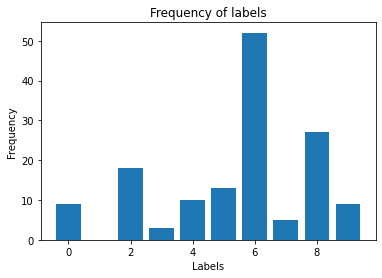

Cluster Pullover has 18 images


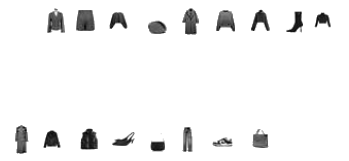

Cluster Sneaker has 5 images


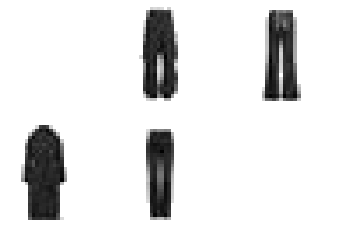

Cluster Shirt has 52 images


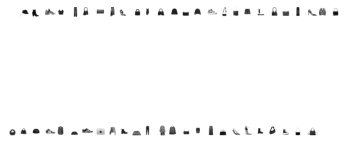

Cluster Bag has 27 images


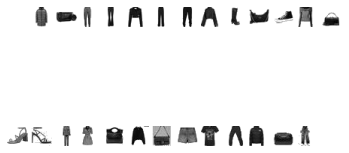

Cluster Ankle boot has 9 images


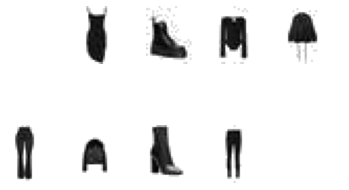

Cluster Coat has 10 images


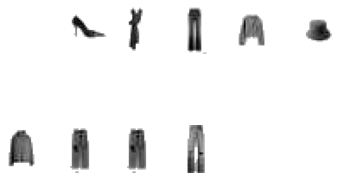

Cluster T-shirt/top has 9 images


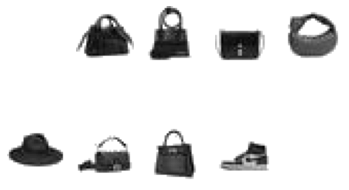

Cluster Sandal has 13 images


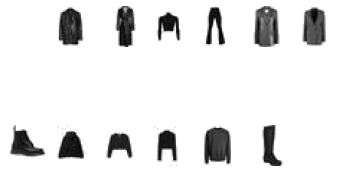

Cluster Dress has 3 images


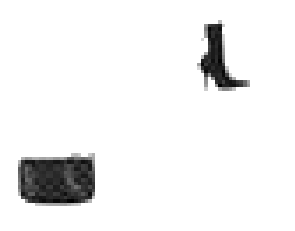

In [ ]:
# use svm_clf to make labels for the new_dataSet
new_dataSet_labels = svm_clf.predict(new_dataSet)
print('Number of labels: ', len(np.unique(new_dataSet_labels)))
print('Number of images: ', len(okay_images))

fashion_mnist_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

# visualize frequency of labels using barv
plt.bar(fashion_mnist_labels.keys(), np.bincount(new_dataSet_labels))
#plt.hist(new_dataSet_labels, bins=10)
plt.title('Frequency of labels')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()



# associate all the images with their labels
svm_labels = {}
for i in range(0, len(okay_images)):
    if new_dataSet_labels[i] in svm_labels:
        svm_labels[new_dataSet_labels[i]].append(okay_images[i])
    else:
        svm_labels[new_dataSet_labels[i]] = [okay_images[i]]

# visualize the images in each cluster
for i in svm_labels.keys():
    print('Cluster', fashion_mnist_labels[i], 'has', len(svm_labels[i]), 'images')
    # plot all the images in the cluster
    for j in range(0, len(svm_labels[i])):
        if j > 0:
            plt.subplot(2, len(svm_labels[i])//2 + 1, j+1)
            plt.imshow(svm_labels[i][j].reshape(new_size, new_size), cmap='gray')
            plt.axis('off')
    plt.show()

As can be observed, the results do not exactly correspond to their labels. Additionally, clusters are very mismatched, withsome clusters having 52 images while others having 5. Within the clusters, many images do not fit, "cluster sandal" being a good example, in which the images are not only not sandals but also a mixture of blouses, pants, and dresses.

### PCA: Round 2

Given the findings above, running PCA for a small number of components would not be able to capture sufficient variance in the data. Therefore, I ran PCA until it was able to capture 98% of the variance. This resulted in approximately 80 components.

The procedure behind this kind of PCA approach is as follows:

Input: Matrix X

1. Standardize the data
```
X = (X - mean(X)) / std(X)
```

2. Calculate the covariance matrix
```
cov_matrix = cov(X)
```

3. Calculate the eigenvectors and eigenvalues of the covariance matrix

```
eigenvalues, eigenvectors = eig(cov_matrix)
```

4. Sort the eigenvectors in descending order by their corresponding eigenvalues.
```
sorted_indices = argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
```

5. Calculate the total sum of the eigenvalues and set a threshold.
```
total_sum = sum(eigenvalues)
cumulative_sum = threshold/100 * total_sum
```

6. Determine the minimum number of principal components required to achieve a desired percentage of variance explained.
```
k = 0
eigsum = 0
while eigsum < cumulative_sum:
    eigsum += eigenvalues[k]
    k += 1
```

7. Project the data onto the selected principal components.
```
selected_eigenvectors = sorted_eigenvectors[:, :k]
```


In [ ]:
variance = 0.98
pca = PCA(variance)
pca.fit(new_dataSet)

new_dataSet = pca.transform(new_dataSet)
new_dataSet.shape


mnist_dataset = StandardScaler().fit_transform(X_train)
variance = 0.98
pca2 = PCA(variance)
pca2.fit(mnist_dataset)
mnist_dataset = pca2.transform(mnist_dataset)

### K-Means

In contrast to SVM, K-Means is an unsupervised learning algorithm, which makes fine-tuning it and evaluating results more difficult. The algorithm is as follows:

1. Initialize the number of clusters, k, and the number of iterations, n.
2. Randomly initialize k centroids.
3. For each iteration, repeat the following steps:
    1. Assign each data point to the closest centroid.
    ```
    for i = 1 to n:
    c_i = argmin_j ||x_i - μ_j||^2
    ```
    Here, c_i is the cluster to which the ith data point is assigned, x_i is the ith data point, μ_j is the jth centroid, and ||x_i - μ_j||^2 is the squared Euclidean distance between the ith data point and the jth centroid.

    2. Update the centroid of each cluster by taking the average of all the data points assigned to that cluster.

    ```
    μ_j = 1/|C_j| * sum(x_i)
    ```

4. Return the final centroids.

Contrary to SVM, the K-Means algorithm does not attempt to maximize the distance to the decision boundary from the points closest to said decision boundary; additionally, K-Means is basedo on Eucledian distance while SVM works based off a kernel trick, mapping the data into a higher dimensional space. Therefore, the results of K-Means are expected to be different and more overfitted from those of SVM.

The following hyperparameter would be kept in mind when fine-tuning the model:
* k: The number of clusters to be formed.
* n_init: The number of times the algorithm will be run with different random initializations (centroid seeds). Since K-Means is a heuristic algorithm, the final results will be dependent on the initial centroids. Therefore, inertia is expected to be significantly improved with a higher number of initializations.


Upon researching how to fine-tune the model, I found the approach of using inertia. The idea is to run the algorithm for a range of possible clusters or the number of iterations and then choose the number of clusters or the number of iterations that results in the lowest inertia. Inertia is defined as the sum of squared distances of samples to their closest cluster center. The lower the inertia, the better the model. At the same time, at some point, the decrease in inertia is not significant enough to justify the increase in complexity. Therefore, the number of clusters or the number of iterations should be chosen such that the decrease in inertia is significant enough to justify the increase in complexity. The general approach has been the "elbow method": choosing the pivot point in an exponential-decay-like curve.

Text(0, 0.5, '$J(C_k)$')

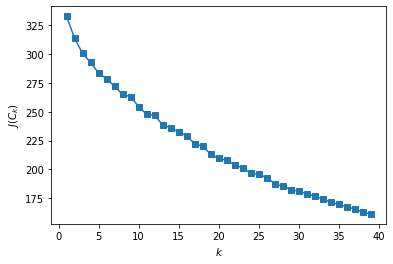

In [ ]:
#to check for best K_means cluster number
new_inertia = []
for k in range(1, 40):
    kmeans_new = KMeans(init = "k-means++", n_clusters=k, random_state=1).fit(new_dataSet)
    new_inertia.append(np.sqrt(kmeans_new.inertia_))

plt.plot(range(1, 40), new_inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

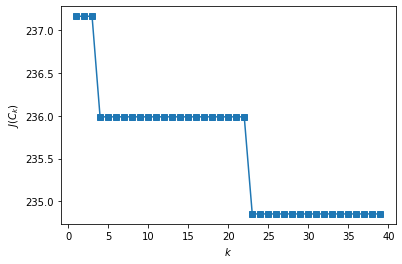

In [ ]:
# fine-tune n_init
new_inertia = []
for k in range(1, 40):
    kmeans_new = KMeans(init = "k-means++", n_clusters=15, random_state=1, n_init=k).fit(new_dataSet)
    new_inertia.append(np.sqrt(kmeans_new.inertia_))

plt.plot(range(1, 40), new_inertia, marker='s')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')
plt.show()

Based on the elbow method, the increased number of clusters seems to result in a lower inertia. Therefore, I would choose a number similar enough to the SVM labels: around 15 clusters. Additionally, the number of increased iterations does not seem to result in a significant inertia decrease, so I would set it at 5, where the first elbow emerges.

In [ ]:

def k_means_cluster(n_clusters, n_init, data):
    k_means = KMeans(init = "k-means++", n_clusters = n_clusters, n_init = n_init, random_state=1)
    k_means.fit(data)
    k_means_labels = k_means.labels_

    G = len(np.unique(k_means_labels)) #Number of labels

    cluster_index= [[] for i in range(G)]

    for i, label in enumerate(k_means_labels,0):
        for n in range(G):
            if label == n:
                cluster_index[n].append(i)
            else:
                continue

    return cluster_index

Number of clusters = 15
Cluster 0


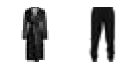

Cluster 1


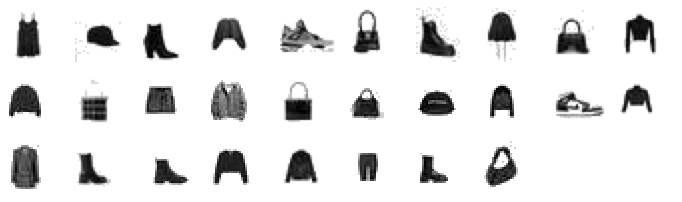

Cluster 2


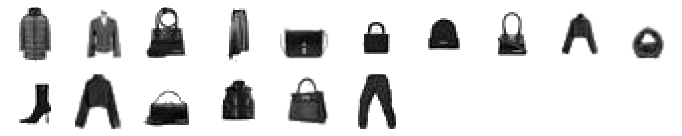

Cluster 3


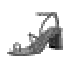

Cluster 4


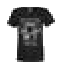

Cluster 5


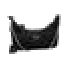

Cluster 6


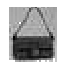

Cluster 7


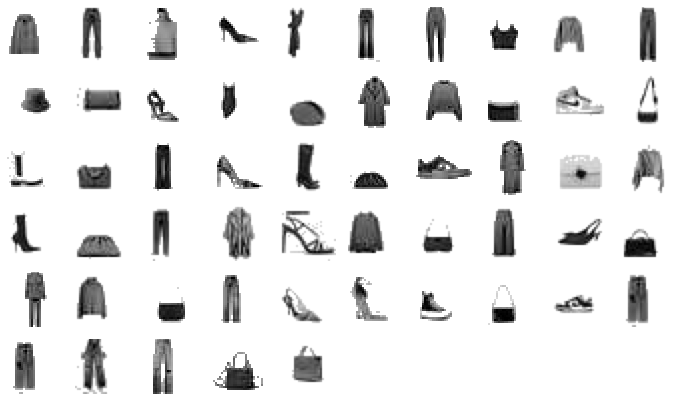

Cluster 8


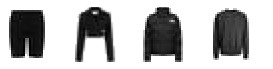

Cluster 9


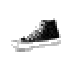

Cluster 10


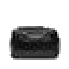

Cluster 11


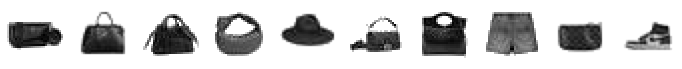

Cluster 12


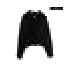

Cluster 13


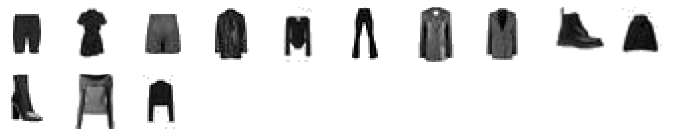

Cluster 14


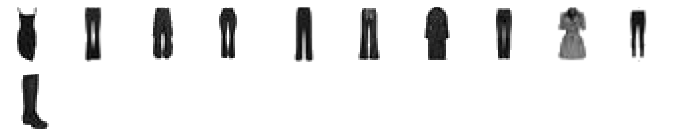

In [ ]:
#Visualisation for clusters = clust
new_size = int(np.sqrt(784))

nc = 15
n_clusters = [i for i in range(nc, nc+1)]


for n in n_clusters:
    print('Number of clusters =', n)
    cluster_index = k_means_cluster(n, 5, new_dataSet)
    
    for clust in range(n):
        print('Cluster', clust)

        try:
            plt.figure(figsize=(12,12))
            for i in range(0, len(cluster_index[clust])):
                
                img = okay_images[cluster_index[clust][i]].reshape(new_size, new_size)
                plt.subplot(10,10,i+1);
                plt.imshow(img, cmap='gray');
                plt.axis('off')
            plt.show()
        except:
            print('No images in this cluster')
            continue


### Hierarchical Clustering

Hierarchical clustering is another unsupervised learning algorithm. The basic idea is to start with each data point in its own cluster, and then iteratively merge clusters based on a measure of similarity until a desired number of clusters is reached or until all data points are in the same cluster.

The pseudo-code for the algorithm is as follows:
1. Initialize each point as its own cluster and set the desired number of clusters.
2. Compute the similarity between each pair of clusters.
```
similarity = ward_distance(cluster_i, cluster_j)
OR 
similarity = average_distance(cluster_i, cluster_j)
OR 
similarity = complete_distance(cluster_i, cluster_j)
OR 
similarity = single_distance(cluster_i, cluster_j)
```
Where ward distance is the sum of squared differences within all clusters, average distance is the average of the distances between all pairs of points in the two clusters, complete distance is the maximum distance between all pairs of points in the two clusters, and single distance is the minimum distance between all pairs of points in the two clusters.

3. Merge the two most similar clusters.
4. Repeat steps 2 and 3 until the desired number of clusters is reached.
5. Return the final clusters.

The following hyperparameters would be kept in mind when fine-tuning the model:
* n_clusters: The number of clusters to be formed.
* linkage: The criterion determinining which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

Once again, I would follow the elbow method to determine the number of clusters and the linkage criterion. The following are the results of the elbow method for the number of clusters:



In [ ]:
from sklearn.cluster import AgglomerativeClustering

num_clusters = 15
clustering_model = AgglomerativeClustering(n_clusters=num_clusters)

# fit the model to the data
clustering_model.fit(new_dataSet)

# retrieve the cluster labels
cluster_labels = clustering_model.labels_

def hierarchical_cluster(n_clusters, linkage, data):
    clustering_model = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    clustering_model.fit(data)
    cluster_labels = clustering_model.labels_

    G = len(np.unique(cluster_labels)) #Number of labels

    cluster_index= [[] for i in range(G)]

    for i, label in enumerate(cluster_labels,0):
        for n in range(G):
            if label == n:
                cluster_index[n].append(i)
            else:
                continue

    return cluster_index

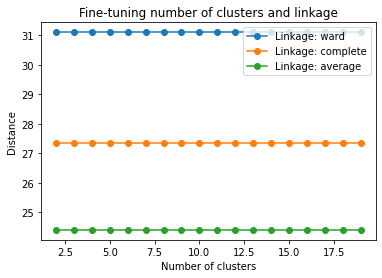

In [ ]:
# fine tuning


# Initialize arrays for storing distances
distances = np.zeros((3, 18))

# Loop over number of clusters and linkage types
for i, linkage in enumerate(['ward', 'complete', 'average']):
    for j in range(2, 20):
        # Initialize agglomerative clustering with current settings
        model = AgglomerativeClustering(n_clusters=j, linkage=linkage, compute_distances=True)
        model.fit(new_dataSet)
        distances[i, j-2] = np.mean(model.distances_)

# Plot distances against number of clusters for each linkage type
for i, linkage in enumerate(['ward', 'complete', 'average']):
    plt.plot(range(2, 20), distances[i], marker='o', label='Linkage: {}'.format(linkage))
plt.xlabel('Number of clusters')
plt.ylabel('Distance')
plt.title(f'Fine-tuning number of clusters and linkage')
plt.legend()
plt.show()


Since the goal is to minize the distance between the clusters, the elbow method does not offer enough difference between the number of clusters. The linkage criterion, however, shows that for an average linkage, the distance between the clusters is the lowest. Therefore, I would choose the average linkage criterion and 15 clusters.

Side note: After choosing the average linkage, the model put almost every clothing item into the same cluster. Therefore, I went back to using the ward linkage criterion, which resulted in a more balanced distribution of clothing items across the clusters. This is likely due to overfitting of the model.



Cluster 0


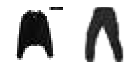

Cluster 1


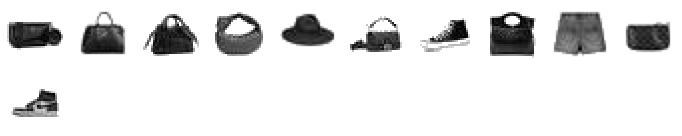

Cluster 2


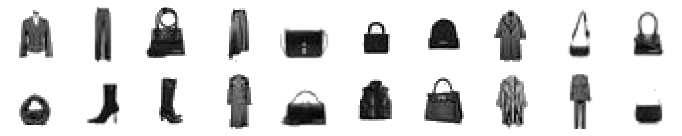

Cluster 3


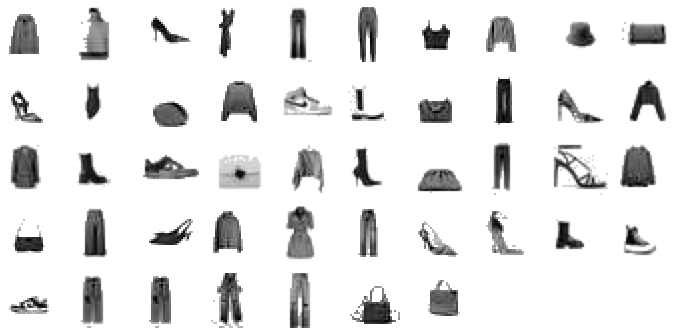

Cluster 4


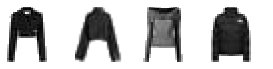

Cluster 5


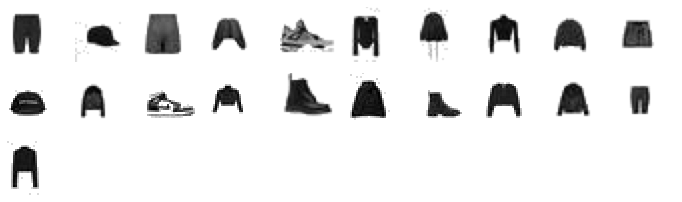

Cluster 6


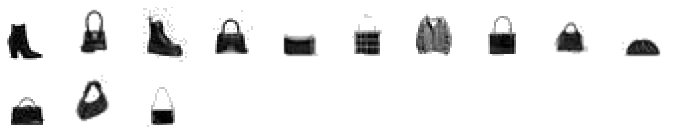

Cluster 7


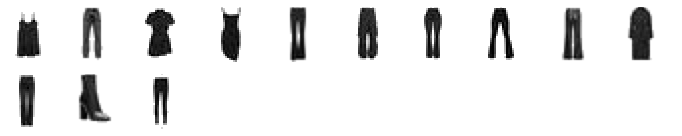

Cluster 8


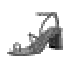

Cluster 9


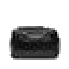

Cluster 10


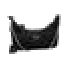

Cluster 11


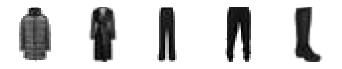

Cluster 12


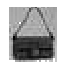

Cluster 13


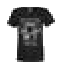

Cluster 14


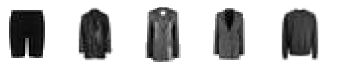

In [ ]:
# visualize which image belongs to which cluster
hier_cluster_index = hierarchical_cluster(15,'ward', new_dataSet)

for clust in range(15):
    print('Cluster', clust)

    try:
        plt.figure(figsize=(12,12))
        for i in range(0, len(hier_cluster_index[clust])):
            
            img = okay_images[hier_cluster_index[clust][i]].reshape(new_size, new_size)
            plt.subplot(10,10,i+1);
            plt.imshow(img, cmap='gray');
            plt.axis('off')
        plt.show()
    except:
        print('No images in this cluster')
        continue

## 4. Results: Aggregation & Visualization

Now, the purpose would be to aggregate the clusters from different models to observe which one would give the most informative results.

8 images were aggregated
The image is classified as Shirt


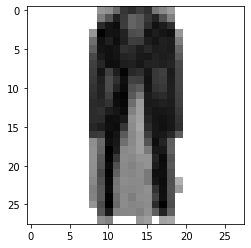

The image is classified as Shirt


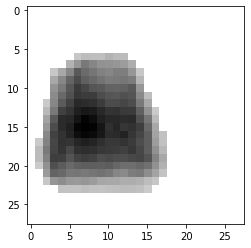

The image is classified as Shirt


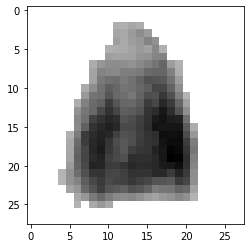

The image is classified as Shirt


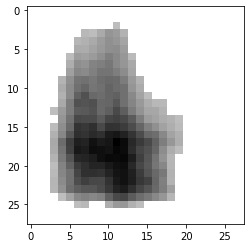

The image is classified as Shirt


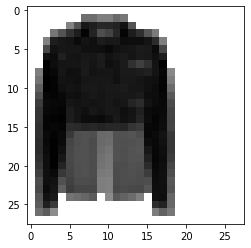

The image is classified as Shirt


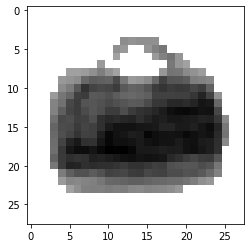

The image is classified as Shirt


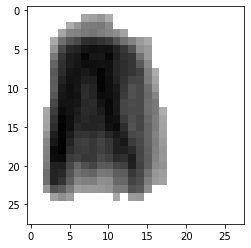

The image is classified as Shirt


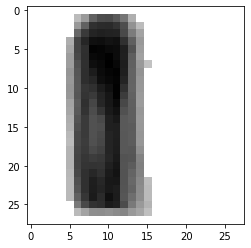

In [ ]:
def aggregator(cluster_index, data, new_size=28):
    new_images = []

    for row in range(len(cluster_index)):
        # if there is only one item in the cluster, skip it
        if len(cluster_index[row]) == 1:
            continue
        else:
            # get the average of all the images in the cluster
            new_array = np.zeros((new_size, new_size))
            for i in range(len(cluster_index[row])):
                new_array += data[cluster_index[row][i]].reshape(new_size, new_size)
            new_array = new_array / len(cluster_index[row])


            # find the average pixel value of the image
            avg = np.mean(new_array)
            # set the values greater than the average to 255 (takes out some noise)
            new_array[new_array > avg] = 255


            new_images.append(new_array)

    return new_images


# test aggregator on cluster_index and okay_images and 28
cluster_images = aggregator(cluster_index, okay_images, 28)


print(len(cluster_images), 'images were aggregated')

for arr in cluster_images:
    plt.imshow(arr, cmap='gray')
    # use SVM to classify the arr image
    # rescale arr using standard scaler
    arr = arr.reshape(1, -1)
    arr = StandardScaler().fit_transform(arr)
    label = svm_clf.predict(arr)
    print('The image is classified as', fashion_mnist_labels[label[0]])
    plt.show()



10 images were aggregated
The image is classified as Shirt


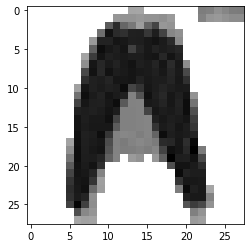

The image is classified as Shirt


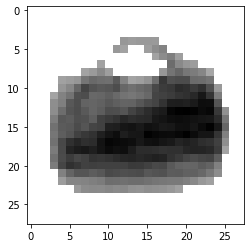

The image is classified as Shirt


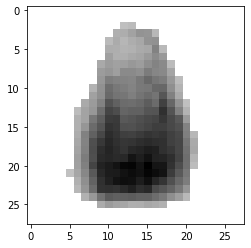

The image is classified as Shirt


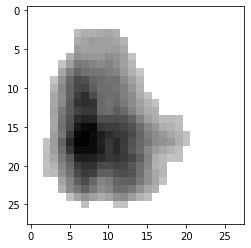

The image is classified as Shirt


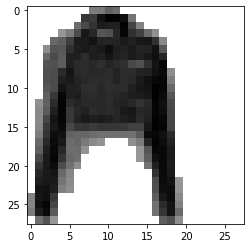

The image is classified as Shirt


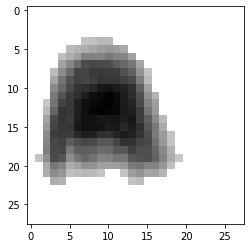

The image is classified as Shirt


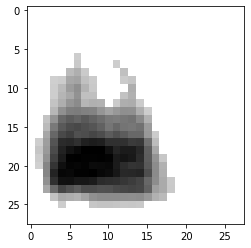

The image is classified as Shirt


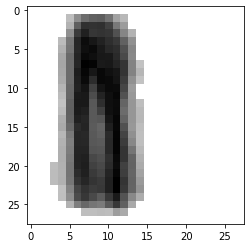

The image is classified as Shirt


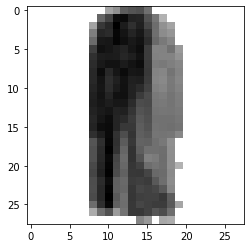

The image is classified as Shirt


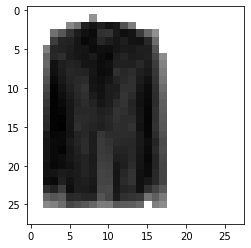

In [ ]:
# test aggregator on hier_cluster_index and okay_images and 28
hier_cluster_images = aggregator(hier_cluster_index, okay_images, 28)

print(len(hier_cluster_images), 'images were aggregated')


for arr in hier_cluster_images:
    plt.imshow(arr, cmap='gray')
    # use SVM to classify the arr image
    # rescale arr using standard scaler
    arr = arr.reshape(1, -1)
    arr = StandardScaler().fit_transform(arr)
    label = svm_clf.predict(arr)
    print('The image is classified as', fashion_mnist_labels[label[0]])
    plt.show()



### SVM

9 images were aggregated
The image is classified as Shirt


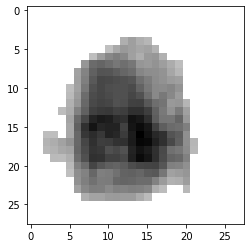

The image is classified as Shirt


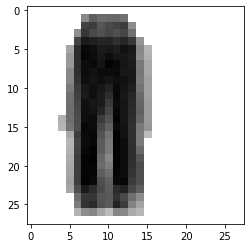

The image is classified as Shirt


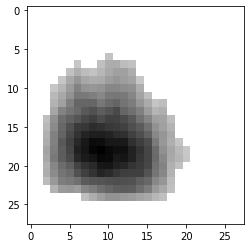

The image is classified as Shirt


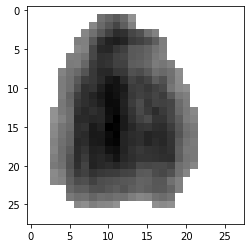

The image is classified as Shirt


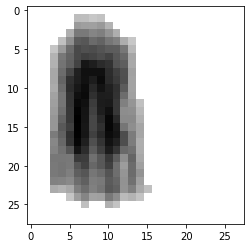

The image is classified as Shirt


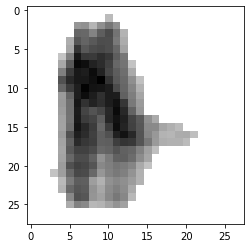

The image is classified as Shirt


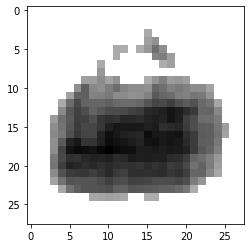

The image is classified as Shirt


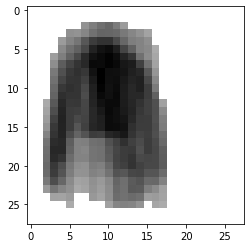

The image is classified as Shirt


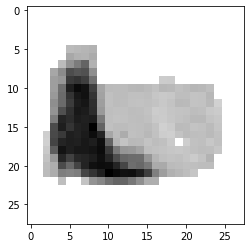

In [ ]:
new_images = []
new_size = 28

for key in svm_labels.keys():

    # if there is only one item in the cluster, skip it
    if len(svm_labels[key]) == 1:
        continue
    else:
        # get the average of all the images in the cluster
        new_array = np.zeros((new_size, new_size))
        for i in range(len(svm_labels[key])):
            new_array += svm_labels[key][i].reshape(new_size, new_size)
        new_array = new_array / len(svm_labels[key])


        # find the average pixel value of the image
        avg = np.mean(new_array)
        # set the values greater than the average to 255 (takes out some noise)
        new_array[new_array > avg] = 255


        new_images.append(new_array)

print(len(new_images), 'images were aggregated')

# visualize the new images
for arr in new_images:
    plt.imshow(arr, cmap='gray')
    arr = arr.reshape(1, -1)
    arr = StandardScaler().fit_transform(arr)
    label = svm_clf.predict(arr)
    print('The image is classified as', fashion_mnist_labels[label[0]])
    plt.show()


### Result Discussion

According to the models, I should get a lot of shirts that look suspiciously like a hybrid between boots and purses.

To be serious, the three different clustering algorithms were able to generate 8 to 10 aggregate images from their respective clusters. All of the aggregate images were identified as shirts, which suggests that either a) the aggregation method was not appropriate, b) the clusters initially were poorly generated, or c) both. 

It is interesting because the clusters gave visually similar results: the boot-like shape, the cardigan-like shape, the coat-like shape, and the multiple purse variations. This makes me think that  there is potential for using clustering algorithms to identify common patterns in fashion images. However, the varying size of the clusters, some being quite small (e.g., only a few images), which could limit the generalizability of the aggregate images, and their composition, some of the clusters containing  a mixture of different types of clothing (e.g., shirts and jackets), which may indicate that the clustering algorithm was not able to identify clear boundaries between different clothing categories.



## 5. Executive Summary

I used hierarchical clustering, k-means, clustering, and SVM to cluster the different clothes from my Instagram saved clothes image collection. I then aggregated the clusters to get shopping recommendations. The results were not as informative as I had hoped, but I think there is potential for using clustering algorithms to identify common patterns in fashion images.

## 6. References

References
Meshukarayamajhi. (2020, July 17). K-means clustering in Fashion-MNIST. Kaggle: Your Machine Learning and Data Science Community. https://www.kaggle.com/code/meshukarayamajhi/k-means-clustering-in-fashion-mnist

Sklearn.cluster.AgglomerativeClustering. (n.d.). scikit-learn. Retrieved March 29, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Sklearn.cluster.KMeans. (n.d.). scikit-learn. Retrieved March 29, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Sklearn.svm.SVC. (n.d.). scikit-learn. Retrieved March 29, 2023, from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


Use of AI:

Asked leading questions to set up the outline of my work and asked for feedback on my understanding of different concepts.